In [1]:
# IMPORT DEPENDENCIES

In [2]:
import pandas as pd
import prophet 

Importing plotly failed. Interactive plots will not work.


In [3]:
# upgrading Jupyter notebook for 'plotly' to work
!pip install --upgrade jupyter



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# IMPORT DATA

In [5]:
sp500_dataframe = pd.read_csv('sp500_index.csv')

In [6]:
# ANALYZE DATAFRAME

In [7]:
# head of dataframe
sp500_dataframe.head()

,Date,S&P500
0,2013-12-20,1818.32
1,2013-12-23,1827.99
2,2013-12-24,1833.32
3,2013-12-26,1842.02
4,2013-12-27,1841.40


In [8]:
# tail of dataframe
sp500_dataframe.tail()

,Date,S&P500
2511,2023-12-13,4707.09
2512,2023-12-14,4719.55
2513,2023-12-15,4719.19
2514,2023-12-18,4740.56
2515,2023-12-19,4768.37


In [9]:
# information about dataframe
sp500_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2516 non-null   object 
 1   S&P500  2516 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.4+ KB


In [10]:
# statistical summary of dataframe
sp500_dataframe.describe()

,S&P500
count,2516.000000
mean,2997.755044
std,898.670112
min,1741.890000
25%,2120.395000
50%,2792.525000
75%,3900.807500
max,4796.560000


In [11]:
# shape of dataframe
sp500_dataframe.shape

(2516, 2)

In [12]:
# rename columns
sp500_dataframe.rename({'Date':'ds','S&P500':'y'},axis=1,inplace=True)

In [13]:
# display  columns
print(sp500_dataframe.columns)

Index(['ds', 'y'], dtype='object')


In [14]:
# re-check head of dataframe
sp500_dataframe.head()

,ds,y
0,2013-12-20,1818.32
1,2013-12-23,1827.99
2,2013-12-24,1833.32
3,2013-12-26,1842.02
4,2013-12-27,1841.40


In [15]:
# TRAIN MODEL

In [16]:
# import dependency to train the model
from prophet import Prophet

In [17]:
m = Prophet(interval_width=0.95, daily_seasonality=True)

In [18]:
# FIT IN THE MODEL

In [19]:
m.fit(sp500_dataframe)

15:33:14 - cmdstanpy - INFO - Chain [1] start processing
15:33:15 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
# FORECASTING AWAY

In [21]:
future = m.make_future_dataframe(periods=100, freq='D')

In [22]:
# predicting/ forecasting 'future'
forecast = m.predict(future)

In [24]:
# display head of 'forecast'
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-12-20,1818.553369,1558.102957,2167.289094,1818.553369,1818.553369,52.704214,52.704214,52.704214,23.438103,...,0.391995,0.391995,0.391995,28.874117,28.874117,28.874117,0.0,0.0,0.0,1871.257583
1,2013-12-23,1819.986689,1556.616620,2156.916535,1819.986689,1819.986689,49.265387,49.265387,49.265387,23.438103,...,2.716751,2.716751,2.716751,23.110534,23.110534,23.110534,0.0,0.0,0.0,1869.252076
2,2013-12-24,1820.464462,1582.852309,2169.794352,1820.464462,1820.464462,47.043743,47.043743,47.043743,23.438103,...,1.935075,1.935075,1.935075,21.670565,21.670565,21.670565,0.0,0.0,0.0,1867.508205
3,2013-12-26,1821.420009,1554.906613,2178.243778,1821.420009,1821.420009,43.146309,43.146309,43.146309,23.438103,...,0.223820,0.223820,0.223820,19.484386,19.484386,19.484386,0.0,0.0,0.0,1864.566317
4,2013-12-27,1821.897782,1580.291856,2149.192352,1821.897782,1821.897782,42.541854,42.541854,42.541854,23.438103,...,0.391995,0.391995,0.391995,18.711756,18.711756,18.711756,0.0,0.0,0.0,1864.439636


In [25]:
# dispaly tail of 'forecast'
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2611,2024-03-24,4134.463708,3751.259821,4403.662260,4076.583411,4189.698368,-50.333326,-50.333326,-50.333326,23.438103,...,-2.929759,-2.929759,-2.929759,-70.841669,-70.841669,-70.841669,0.0,0.0,0.0,4084.130382
2612,2024-03-25,4134.310489,3804.276525,4381.240460,4075.401001,4190.132805,-42.185602,-42.185602,-42.185602,23.438103,...,2.716751,2.716751,2.716751,-68.340455,-68.340455,-68.340455,0.0,0.0,0.0,4092.124887
2613,2024-03-26,4134.157270,3787.194955,4418.334122,4074.243823,4190.641403,-40.187662,-40.187662,-40.187662,23.438103,...,1.935075,1.935075,1.935075,-65.560839,-65.560839,-65.560839,0.0,0.0,0.0,4093.969609
2614,2024-03-27,4134.004052,3775.524397,4406.540741,4073.086739,4191.483654,-38.507941,-38.507941,-38.507941,23.438103,...,0.591876,0.591876,0.591876,-62.537919,-62.537919,-62.537919,0.0,0.0,0.0,4095.496111
2615,2024-03-28,4133.850833,3797.656869,4410.684697,4071.929655,4192.325905,-35.646345,-35.646345,-35.646345,23.438103,...,0.223820,0.223820,0.223820,-59.308268,-59.308268,-59.308268,0.0,0.0,0.0,4098.204487


In [26]:
# PLOT FORECAST

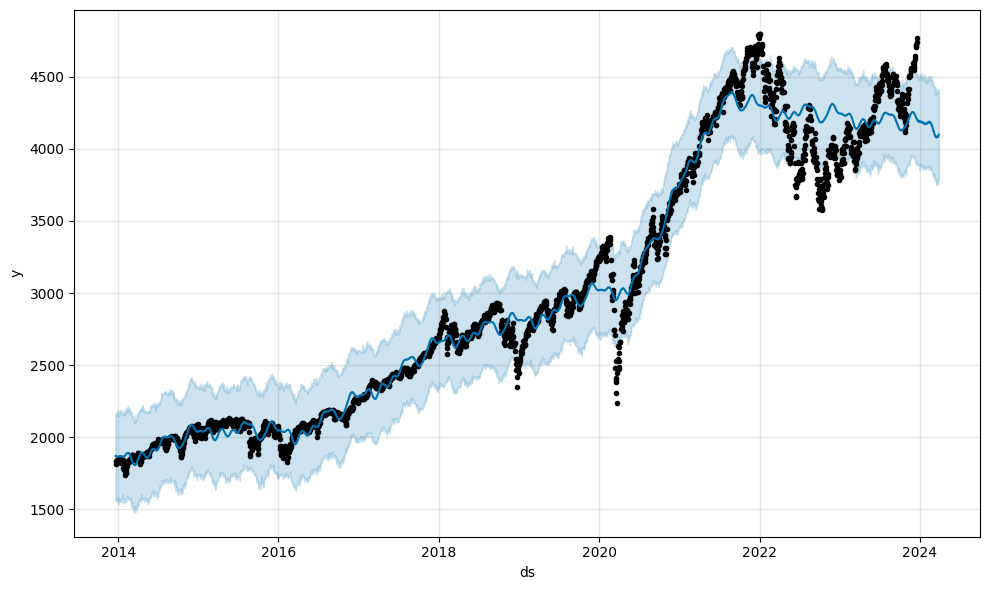

In [27]:
# Creating a time series regression 
fig = m.plot(forecast)

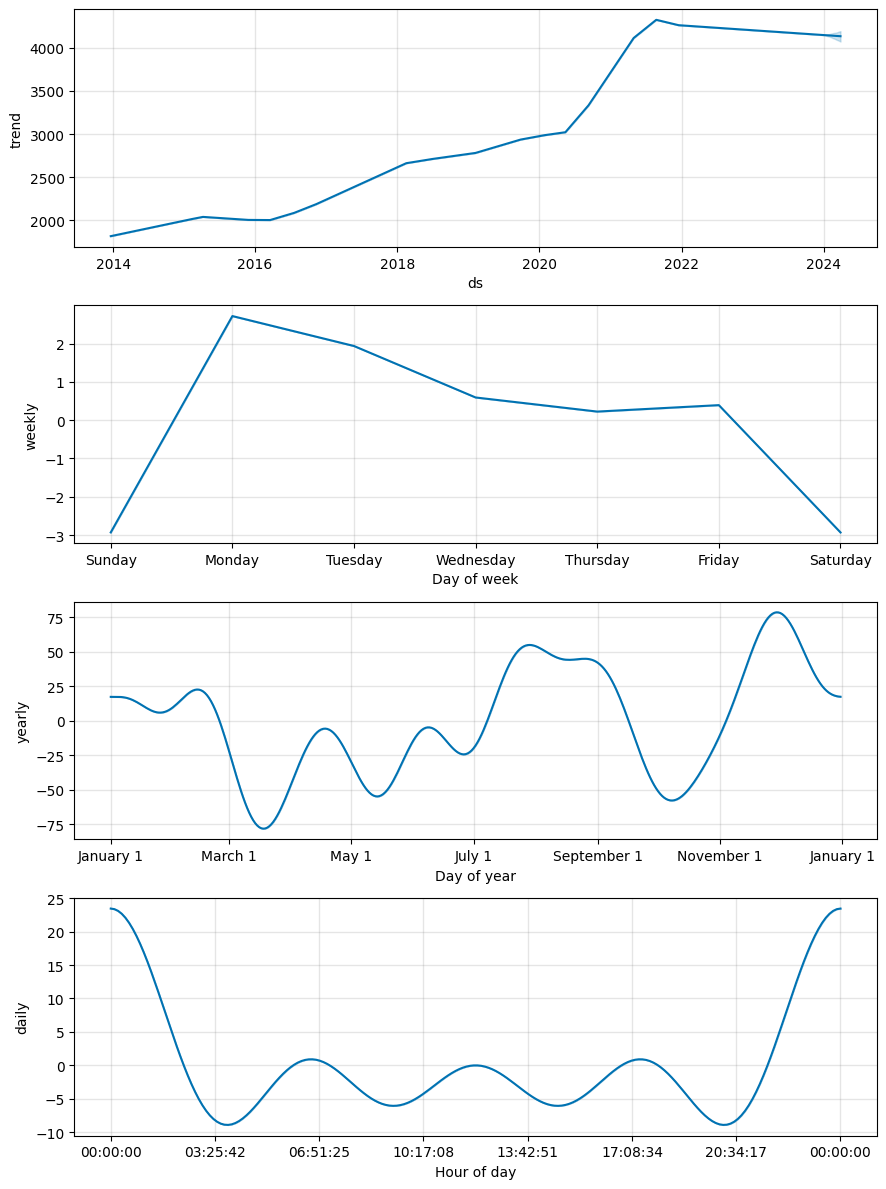

In [28]:
fig2 = m.plot_components(forecast)